ПРОЕКТ ПО МЛ <br>
Группа: ИУ1-41Б <br>
Выполнили: Болдов, Карпухов, Валеев <br>

Описание датасета <br>
- Country - страна 
- Year - год рождения
- Life expectancy - продолжительность жизни
- Adult Mortality - Показатели смертности взрослого населения обоих полов (вероятность смерти в возрасте от 15 до 60 лет на 1000 человек населения)
- infant deaths - Число младенческих смертей на 1000 человек населения
- Alcohol - Алкоголь, зарегистрированное потребление на душу населения (15+) (в литрах чистого алкоголя)
- percentage expenditure - Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения(%)
- Hepatitis B - Охват иммунизацией против гепатита В (HepB) среди детей в возрасте до 1 года (%)
- Measles - Корь - число зарегистрированных случаев на 1000 человек населения
- BMI - Средний индекс массы тела всего населения
- under-five deaths - Число смертей в возрасте до пяти лет на 1000 человек населения
- Polio - Охват иммунизацией от полиомиелита (Pol3) среди детей в возрасте до 1 года (%)
- Total expenditure - Общие государственные расходы на здравоохранение в процентах от общих государственных расходов (%)
- Diphtheria - Охват иммунизацией против дифтерии, столбнячного анатоксина и коклюша (DTP3) среди детей в возрасте до 1 года (%)
- HIV/AIDS - Смертность на 1 000 живорождений ВИЧ/СПИД (0-4 года)
- GDP - Валовой внутренний продукт на душу населения (в долларах США)
- Population - Население страны
- thinness 1-19 years - Распространенность худобы среди детей и подростков в возрасте от 10 до 19 лет (% )
- thinness 5-9 years - Распространенность худобы среди детей в возрасте от 5 до 9 лет (%)
- Prevalence of thinness among children aged 5 to 9 years (%) - Индекс человеческого развития с точки зрения структуры доходов и ресурсов (индекс в диапазоне от 0 до 1)
- Schooling - Количество лет обучения в школе (лет)

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor

Вобщем датасет на регрессию. Надо предсказать время жизни. Наша целевая переменная Life expectancy

In [232]:
life_expect_data = pd.read_csv('./data/Life Expectancy Data.csv')

In [233]:
life_expect_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [234]:
life_expect_data.isnull().sum() / len(life_expect_data) * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

C:\Users\moroj\AppData\Local\Temp\ipykernel_1184\1806192703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(life_expect_data.corr())


<Axes: >

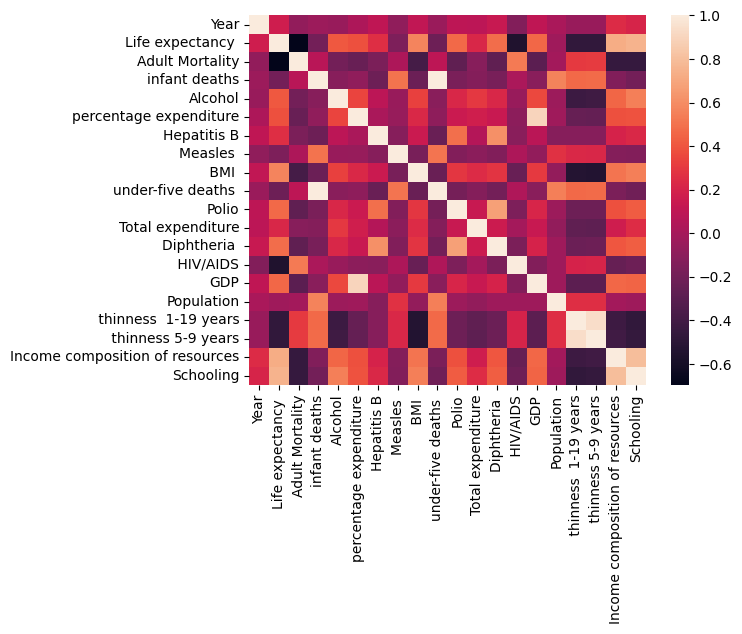

In [235]:
sns.heatmap(life_expect_data.corr())

Избавимся от пропусков

In [236]:
#удаляем столбцы с большим колличеством пропусков и плохой корелляцией
life_expect_data = life_expect_data.drop(['Population'],axis=1)
life_expect_data = life_expect_data.drop([' thinness  1-19 years'],axis=1)
life_expect_data = life_expect_data.drop([' thinness 5-9 years'],axis=1)
life_expect_data = life_expect_data.drop(['Adult Mortality'],axis=1)
life_expect_data = life_expect_data.drop(['Income composition of resources'],axis=1)
life_expect_data = life_expect_data.drop(['Country', 'Status'],axis=1)
#life_expect_data = life_expect_data.drop([' HIV/AIDS'], axis=1)

In [237]:
#Заменяем пропуски средним значением
life_expect_data['Hepatitis B'] = life_expect_data['Hepatitis B'].transform(lambda val: val.fillna(val.mean()))
life_expect_data['GDP'] = life_expect_data['GDP'].transform(lambda val: val.fillna(val.mean()))
life_expect_data['Alcohol'] = life_expect_data['Alcohol'].transform(lambda val: val.fillna(val.mean()))
life_expect_data[' BMI '] = life_expect_data[' BMI '].transform(lambda val: val.fillna(val.mean()))
life_expect_data['Life expectancy '] = life_expect_data['Life expectancy '].transform(lambda val: val.fillna(val.mean()))
life_expect_data['Total expenditure'] = life_expect_data['Total expenditure'].transform(lambda val: val.fillna(val.mean()))
life_expect_data['Schooling'] = life_expect_data['Schooling'].transform(lambda val: val.fillna(val.mean()))
life_expect_data['Diphtheria '] = life_expect_data['Diphtheria '].transform(lambda val: val.fillna(val.mean()))



In [238]:
#Заменяем пропуски нулями
life_expect_data['Polio'] = life_expect_data['Polio'].transform(lambda val: val.fillna(0))

In [239]:
life_expect_data.isnull().sum() / len(life_expect_data) * 100

Year                      0.0
Life expectancy           0.0
infant deaths             0.0
Alcohol                   0.0
percentage expenditure    0.0
Hepatitis B               0.0
Measles                   0.0
 BMI                      0.0
under-five deaths         0.0
Polio                     0.0
Total expenditure         0.0
Diphtheria                0.0
 HIV/AIDS                 0.0
GDP                       0.0
Schooling                 0.0
dtype: float64

<Axes: >

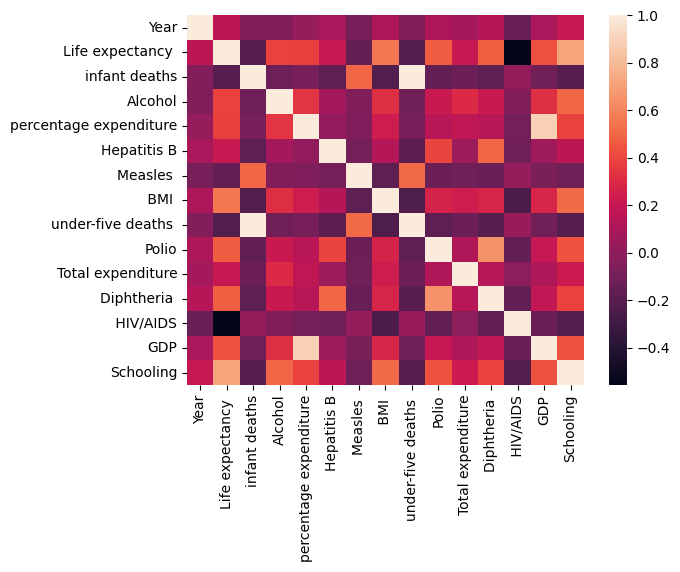

In [240]:
sns.heatmap(life_expect_data.corr())

In [241]:
#Отделим столбец с целевой переменной
X = life_expect_data.drop(['Life expectancy '],axis=1)
y = life_expect_data['Life expectancy ']

In [242]:
#Разобьем на обучающую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [243]:
#Промасштабируем данные
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

ElasticNet

In [244]:
elastic_model = ElasticNet()

Сначала с дефолтными гипперпараметрами

In [245]:
#обучаем модель
elastic_model.fit(scaled_X_train,y_train)

ElasticNet()

In [246]:
y_pred_without_param = elastic_model.predict(scaled_X_test) 

In [247]:
#MAE
mean_absolute_error(y_test,y_pred_without_param)

4.036422962646582

In [248]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_without_param))

5.113194176693608

ElasticNet использует гиперпараметры alpa и L1_ratio. Создадим словарь с набором различных значений этих параметров для поиска по сетке

In [249]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}


In [250]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [251]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [252]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.7}

In [253]:
#Оценим работу модели на тестовом наборе данных
y_pred = grid_model.predict(scaled_X_test)

In [254]:
#MAE
mean_absolute_error(y_test,y_pred)

3.5854689305372376

In [255]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

4.624992290708392

Ну без параметров конечно хуже, но улучшения, прямо скажем, не впечатляющие

Линейная регрессия

In [314]:
LinReg = LinearRegression()

Попробуем натренировать на не отмасштабированных данных

In [315]:
LinReg.fit(X_train,y_train)

LinearRegression()

In [316]:
y_pred_linreg = LinReg.predict(X_test)

In [317]:
#MAE
mean_absolute_error(y_test, y_pred_linreg)

3.523279980938407

In [318]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_linreg))

4.561552276639069

In [319]:
#MAPE
mean_absolute_percentage_error(y_test,y_pred_linreg)

0.05206499213053391

Теперь применим метрики к модели с отмасштабированными данными:

In [320]:
LinReg.fit(scaled_X_train,y_train)

LinearRegression()

In [324]:
y_pred_linreg = LinReg.predict(scaled_X_test)

In [325]:
#MAE
mean_absolute_error(y_test, y_pred_linreg)

3.5232799809384154

In [326]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_linreg))

4.561552276639043

In [327]:
#MAPE
mean_absolute_percentage_error(y_test,y_pred_linreg)

0.05206499213053399

Для модели линейной регресии масштабирование не имеет особого смыла

Стохастический градиентный спуск

In [256]:
SGDreg = SGDRegressor()

Попробуем натренировать на не отмасштабированных данных

In [309]:
SGDreg.fit(X_train,y_train)

SGDRegressor()

In [310]:
y_pred_SGD = SGDreg.predict(X_test)

In [311]:
mean_absolute_error(y_test,y_pred_SGD)

1.9879857655041786e+17

In [312]:
np.sqrt(mean_squared_error(y_test,y_pred_SGD))

3.8271703296294554e+17

In [313]:
mean_absolute_percentage_error(y_test,y_pred_SGD)

2652257726305903.0

В модели же стохастического градиентного спуска мы видим обратную ситуацию. Здесь масштабирование данных имеет ключевую роль в корректном предсказании, поскольку без него результаты, мягко говоря, не очень...

С дефолтными гиперпараметрами

In [308]:
SGDreg.fit(scaled_X_train,y_train)

SGDRegressor()

In [257]:

y_pred_SGD_no_param = SGDreg.predict(scaled_X_test)

In [258]:
#MAE
mean_absolute_error(y_test,y_pred_SGD_no_param)

3.567939062030966

In [259]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_SGD_no_param))

4.5781707947438

In [260]:
#MAPE
mean_absolute_percentage_error(y_test,y_pred_SGD_no_param)

0.052613054599589676

Подберем гиперпараметры

In [289]:
param_grid = {'alpha':[0.000001,0.0001,0.001,0.01,0.1 , 1 , 5, 10, 50, 100, 120, 140],
              'max_iter':[20, 40, 60, 80, 100, 120, 140, 500, 700, 1000,2000,5000,10000]}

In [290]:
grid_model_SGD = GridSearchCV(estimator=SGDreg,
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=5,
                              verbose=1)

In [ ]:
grid_model_SGD.fit(scaled_X_train,y_train)

In [292]:
grid_model_SGD.best_params_

{'alpha': 1e-06, 'max_iter': 700}

In [293]:
y_pred_SGD_with_param = grid_model_SGD.predict(scaled_X_test)

In [294]:
#MAE
mean_absolute_error(y_test,y_pred_SGD_with_param)

3.571094893251081

In [295]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_SGD_with_param))

4.60311520418841

In [297]:
#MAPE
mean_absolute_percentage_error(y_test,y_pred_SGD_with_param)

0.05277051504753105

Проверим результаты при использовании ансамблевых моделей на примере Bagging Regressor:

In [298]:
EnsRegr = BaggingRegressor(n_estimators=10, random_state=0).fit(scaled_X_train, y_train)

In [299]:
y_pred_Ens = EnsRegr.predict(scaled_X_test)

In [300]:
#MAE
mean_absolute_error(y_test,y_pred_Ens)

1.71137769042043

In [301]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_Ens))

2.4716036295113857

In [302]:
#MAPE
mean_absolute_percentage_error(y_test,y_pred_Ens)

0.024902643042003465

Теперь посмотрим как повлияет на качество модели увеличение количество решающих деревьев:

In [303]:
EnsRegr = BaggingRegressor(n_estimators=25, random_state=0).fit(scaled_X_train, y_train)


In [304]:
y_pred_Ens = EnsRegr.predict(scaled_X_test)

In [305]:
#MAE
mean_absolute_error(y_test,y_pred_Ens)

1.6789422790974329

In [306]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_Ens))

2.4155444915740865

In [307]:
#MAPE
mean_absolute_percentage_error(y_test,y_pred_Ens)

0.02426150070940427

Как и ожидалось, использование ансамблевой модели позволило довольно существенно снизить ошибку по сравнению с другими моделями регрессии. Однако увеличение количества решающих деревьев не приводит к кратному уменьшению ошибки (а также может стать причиной переобучения).